In [6]:
import pandas as pd
data = pd.read_csv("student-mat.csv",sep=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Length: 395, dtype: bool

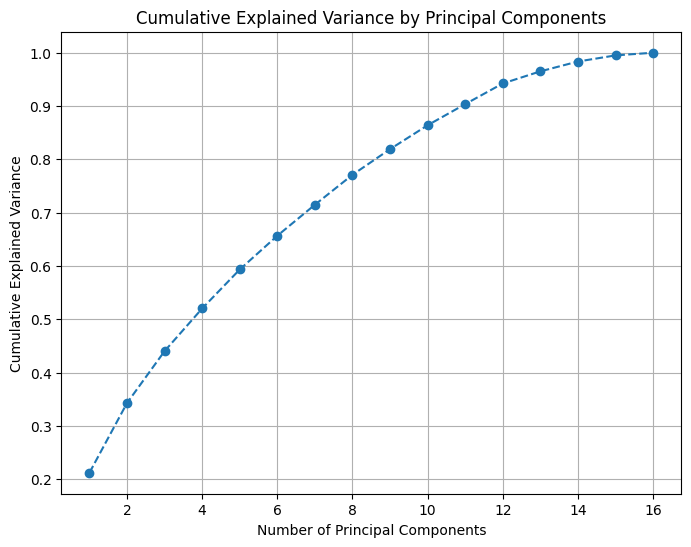

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_data = data[numerical_cols]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
pca = PCA()
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(
    data=pca_result,
    columns=[f"PC{i+1}" for i in range(pca_result.shape[1])]
)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()



In [10]:
print("First 5 Rows of PCA Results:")
print(pca_df.head())

First 5 Rows of PCA Results:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.237779 -0.631418  2.284534 -0.476026  0.915623 -0.449974  1.178671   
1 -2.047520 -2.314948 -0.201799  0.873457  0.712254 -0.156897 -0.128189   
2 -2.415952 -0.829879 -1.307950 -0.279088 -0.486246  0.660775 -1.865384   
3  2.670242 -1.195463  0.160069 -0.422397 -1.183210  0.350316 -0.281958   
4 -0.083111 -0.994260  1.233626  0.330133 -0.785698  0.886560 -0.174628   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.850598  0.669799  0.004291  0.034450 -0.954384 -0.228176 -0.313329   
1 -0.043922 -1.464245 -0.870215 -0.379931 -0.382884 -0.125570 -0.366324   
2  0.142745 -0.488154  0.451404  0.616730  3.123414  0.571568  0.155722   
3  1.468446  0.323474  0.615305  0.300197  0.409026 -1.139048 -0.080397   
4  0.500687 -0.250137 -0.251445 -0.416768 -0.083258 -0.010767  0.486271   

       PC15      PC16  
0 -0.917526 -0.009196  
1 -0.524303 -0.232769

In [11]:
print("\nExplained Variance Ratio for Each Principal Component:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.2%}")



Explained Variance Ratio for Each Principal Component:
PC1: 21.22%
PC2: 13.08%
PC3: 9.74%
PC4: 8.00%
PC5: 7.31%
PC6: 6.33%
PC7: 5.82%
PC8: 5.62%
PC9: 4.81%
PC10: 4.48%
PC11: 3.96%
PC12: 3.87%
PC13: 2.28%
PC14: 1.84%
PC15: 1.15%
PC16: 0.50%


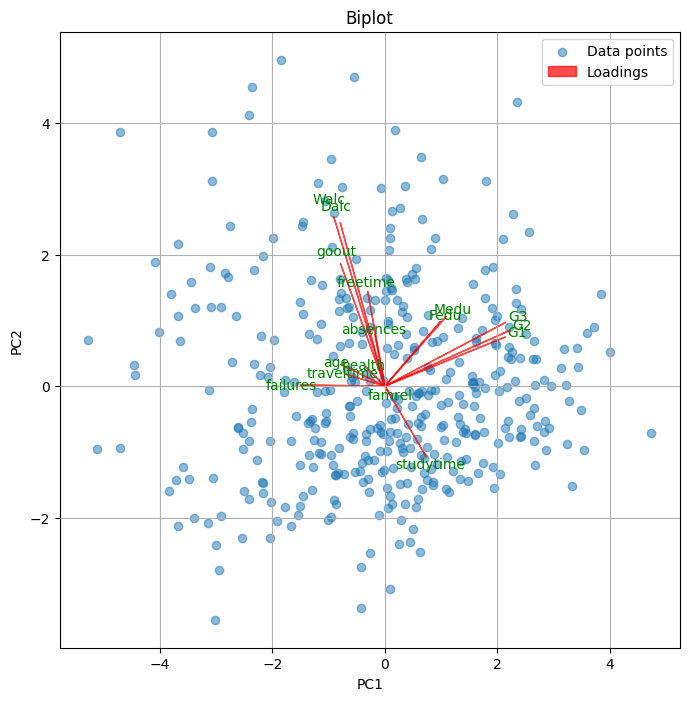

In [12]:
def biplot(score, coeff, labels=None):
    """
    Creates a biplot for PCA results.

    Parameters:
    - score: Transformed data (PCA scores).
    - coeff: PCA components (loadings).
    - labels: Labels for the variables (columns in the original data).
    """
    xs = score[:, 0]
    ys = score[:, 1]
    plt.figure(figsize=(8, 8))
    plt.scatter(xs, ys, alpha=0.5, label="Data points")
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0]*max(xs), coeff[i, 1]*max(ys), color='r', alpha=0.7, label="Loadings" if i == 0 else None)
        if labels is None:
            plt.text(coeff[i, 0]*max(xs)*1.1, coeff[i, 1]*max(ys)*1.1, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0]*max(xs)*1.1, coeff[i, 1]*max(ys)*1.1, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.grid()
    plt.title('Biplot')
    plt.show()

# Generate biplot with labels
biplot(pca_result, pca.components_.T, labels=numerical_cols)


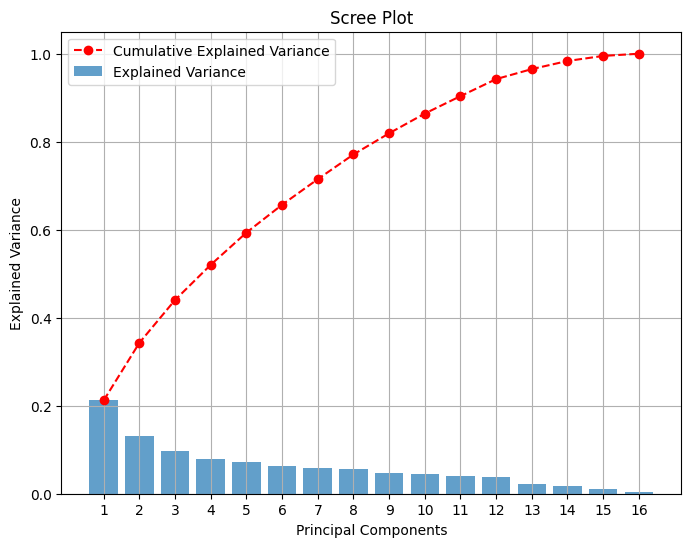

In [13]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label="Explained Variance")
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', color='r', linestyle='--', label="Cumulative Explained Variance")
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid()
plt.show()


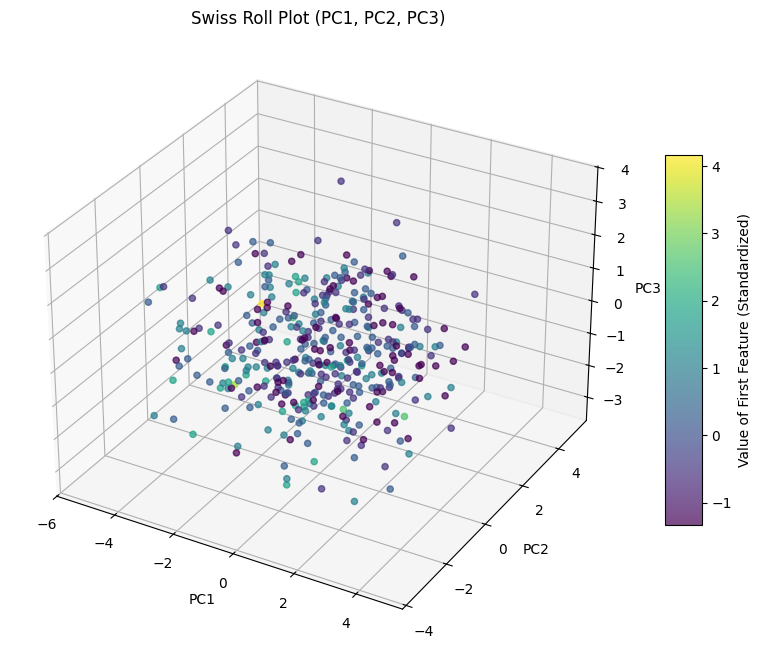

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Swiss roll plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=scaled_data[:, 0], cmap='viridis', alpha=0.7)
ax.set_title('Swiss Roll Plot (PC1, PC2, PC3)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add color bar as a legend
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)
cbar.set_label('Value of First Feature (Standardized)')

plt.show()


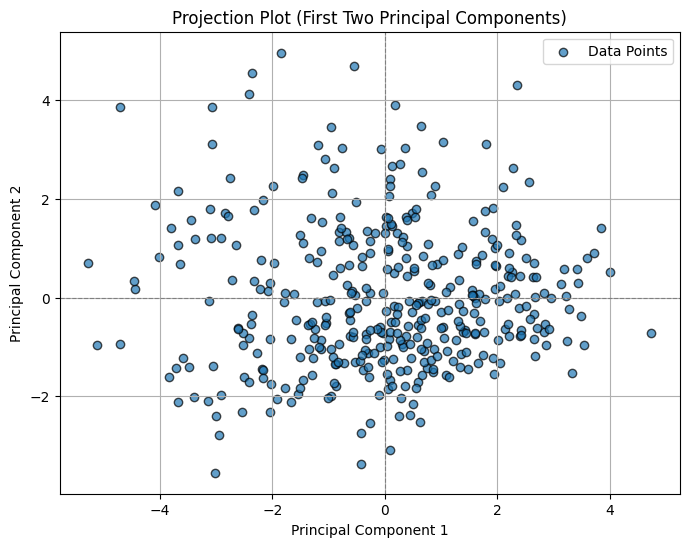

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolor='k', label='Data Points')
plt.title('Projection Plot (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid()
plt.show()